# Implementación

* Sobrepoblación: Si una célula viva es rodeada por más de tres células vivas, muere.
* Estasis: Si una célula viva es rodeada por dos o tres células vivas, sobrevive.
* Subpoblación: Si una célula viva es rodeada por menos de dos células vivas, muere.
* Reproduction: Si una célula muerta es rodeada por exáctamente tres células vivas, esta se vuelve una célula viva.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from ipywidgets import interact
from ipywidgets import fixed
import numba
%load_ext line_profiler
%matplotlib inline

In [2]:
@numba.jit
def search(cells, row, col):
    alive = 0
    limIzq = limSup = -1
    limDer = limInf = 2
    
    if row == 0:
        limIzq = 0
    if col == 0:
        limSup = 0
    if row == N-1:
        limDer = 1
    if col == N-1:
        limInf = 1
    
    for i in range(limIzq,limDer):
        for j in range(limSup,limInf):
            if (i,j) != (0,0):
                if cells[row+i][col+j] == 1:
                    alive+=1;
    return(alive)

In [11]:
def iteration(original, iterations):
    
    if len(solutions) == 0:
        solutions.append(original)
        
    newCells = np.copy(solutions[-1])
    newGeneration = np.zeros(newCells.shape)
    
    if len(solutions) <= iterations:
        for k in range(len(solutions), iterations):
            for i in range(newCells.shape[0]):
                for j in range(newCells.shape[1]):
                    q = search(newCells, i, j)
                    if newCells[i][j] == 1:
                        if q > 3:
                            newGeneration[i][j] = 0
                        elif q < 2:
                            newGeneration[i][j] = 0
                        else:
                            newGeneration[i][j] = 1
                    else:
                        if q == 3:
                            newGeneration[i][j] = 1
            solutions.append(newGeneration)
            newCells = np.copy(newGeneration)
            newGeneration = np.zeros(newCells.shape)
        return(newCells)
    
    else:
        return solutions[iterations]


# Profiling

In [31]:
N = 10
cells = np.random.randint(2, size =(N,N))

In [5]:
%%timeit
iteration(cells, 1)

The slowest run took 1601.44 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 3: 422 µs per loop


In [6]:
%%timeit
iteration(cells, 10)

100 loops, best of 3: 4.08 ms per loop


In [7]:
%%timeit
iteration(cells, 100)

10 loops, best of 3: 39.9 ms per loop


In [8]:
%%prun -s cumulative -q -l 15 -T prun0
iteration(cells, 100)

 
*** Profile printout saved to text file 'prun0'. 


In [9]:
print(open('prun0', 'r').read())

         40007 function calls in 0.111 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.111    0.111 {built-in method builtins.exec}
        1    0.000    0.000    0.111    0.111 <string>:2(<module>)
        1    0.097    0.097    0.111    0.111 <ipython-input-3-14fb54256f8b>:1(iteration)
    40000    0.014    0.000    0.014    0.000 <ipython-input-2-f678187862dd>:1(search)
        1    0.000    0.000    0.000    0.000 {built-in method numpy.core.multiarray.zeros}
        1    0.000    0.000    0.000    0.000 function_base.py:1264(copy)
        1    0.000    0.000    0.000    0.000 {built-in method numpy.core.multiarray.array}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}


In [10]:
%lprun -T lprof0 -f iteration iteration(cells, 100)


*** Profile printout saved to text file 'lprof0'. 


In [11]:
print(open('lprof0', 'r').read())

Timer unit: 1e-06 s

Total time: 0.203909 s
File: <ipython-input-3-14fb54256f8b>
Function: iteration at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def iteration(original, iterations):
     2         1           61     61.0      0.0      newCells = np.copy(original)
     3         1           14     14.0      0.0      newGeneration = np.zeros(newCells.shape)
     4       101           81      0.8      0.0      for k in range(iterations):
     5                                                   
     6                                                   #error aca
     7       100           70      0.7      0.0          newGeneration = newCells
     8                                                   
     9      2100         1499      0.7      0.7          for i in range(newCells.shape[0]):
    10     42000        30196      0.7     14.8              for j in range(newCells.shape[1]):
    11     40000        5770

# Visualización

In [4]:
def visualization(original, it):
    newCells = iteration(original, it)
    plt.imshow(newCells, interpolation=None)
    plt.show()

In [13]:
N = 20
cells = np.random.randint(2, size =(N,N))
solutions = []

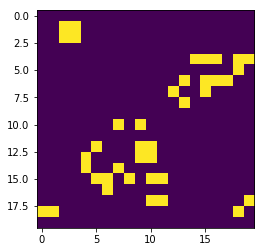

In [14]:
interact(visualization, original=fixed(cells), it = (0,100,1))

In [10]:
cells

array([[0, 0, 0, 1, 0, 1, 0, 1, 1, 0],
       [1, 0, 1, 0, 1, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0, 1, 0, 1, 0],
       [1, 0, 1, 1, 1, 0, 0, 0, 1, 0],
       [1, 1, 0, 1, 0, 0, 1, 0, 1, 1],
       [0, 1, 0, 1, 1, 0, 1, 1, 1, 1],
       [0, 0, 1, 0, 0, 1, 1, 1, 0, 1],
       [1, 1, 0, 1, 0, 0, 1, 0, 0, 0],
       [1, 1, 1, 1, 1, 0, 0, 0, 1, 0],
       [1, 1, 0, 0, 1, 1, 1, 0, 0, 0]])

In [9]:
solutions[0]

array([[0, 0, 0, 1, 0, 1, 0, 1, 1, 0],
       [1, 0, 1, 0, 1, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0, 1, 0, 1, 0],
       [1, 0, 1, 1, 1, 0, 0, 0, 1, 0],
       [1, 1, 0, 1, 0, 0, 1, 0, 1, 1],
       [0, 1, 0, 1, 1, 0, 1, 1, 1, 1],
       [0, 0, 1, 0, 0, 1, 1, 1, 0, 1],
       [1, 1, 0, 1, 0, 0, 1, 0, 0, 0],
       [1, 1, 1, 1, 1, 0, 0, 0, 1, 0],
       [1, 1, 0, 0, 1, 1, 1, 0, 0, 0]])